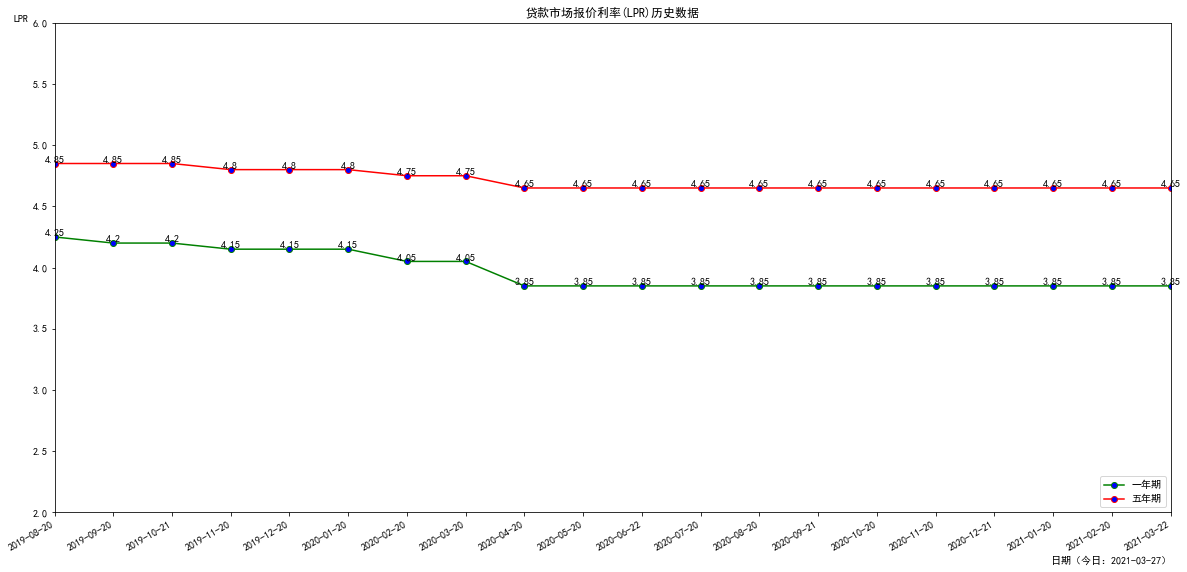

In [6]:
import requests
import json
import time
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif']=['SimHei']      
plt.rcParams['axes.unicode_minus'] = False      

now = time.time()
local_time = time.localtime(now)
today = time.strftime('%Y-%m-%d', local_time)
thisYear = time.strftime('%Y', local_time)
thisMonthDay = time.strftime('%m%d', local_time)

initDate = '2019-08-20'
initYear = 2019
endMonthDay = '-08-20'
startMonthDay = '-08-19'

nYears = int(thisYear) - initYear #年份差
m = int(thisMonthDay) - 820 #月份大小
if m > 0:
    n = nYears          #实际年份差
else:
    n = nYears - 1    

baseUrl = "http://www.chinamoney.com.cn/ags/ms/cm-u-bk-currency/LprHis?lang=CN"

records = []
# if n == 0: #不足一年的情况
#     strStartDate = initDate
#     strEndDate = today
#     url = baseUrl + "&strStartDate=" + strStartDate + "&strEndDate=" + strEndDate
#     res = requests.get(url)
#     data = json.loads(res.text)
#     records = records + data['records'][::-1]
# else:   #超过一年的情况
strStartDate = ''
strEndDate = ''
i = 0
while i < n:
    strStartDate = str(initYear + i) + endMonthDay 
    strEndDate = str(initYear + i + 1) + startMonthDay
    url = baseUrl + "&strStartDate=" + strStartDate + "&strEndDate=" + strEndDate
    res = requests.get(url)
    data = json.loads(res.text)
    records = records + data['records'][::-1]
    i = i + 1
strStartDate = str(initYear + i) + endMonthDay 
strEndDate = today
url = baseUrl + "&strStartDate=" + strStartDate + "&strEndDate=" + strEndDate
res = requests.get(url)
data = json.loads(res.text)
records = records + data['records'][::-1]

# print(records)

x = []
y1 = []
y5 = []
for record in records:
    x.append(record['showDateCN'])
    y1.append(float(record['1Y']))
    y5.append(float(record['5Y']))


fig=plt.figure(figsize=(20,10))

plt.plot(x,y1,color='g',markerfacecolor='blue',marker='o',label="一年期")    
plt.plot(x,y5,color='r',markerfacecolor='blue',marker='o',label="五年期")    

for a, b in zip(x, y1):  
    plt.text(a, b, b, ha='center', va='bottom', fontsize=10)  
for a, b in zip(x, y5):  
    plt.text(a, b, b, ha='center', va='bottom', fontsize=10)  

plt.title("贷款市场报价利率(LPR)历史数据")
plt.xlabel("日期（今日："+today+"）", loc = "right")
plt.ylabel("LPR", loc = "top", rotation = 0)

plt.legend(loc='lower right')

plt.ylim(2, 6)
plt.xlim(initDate,records[-1]['showDateCN'])
fig.autofmt_xdate()

plt.show()